In [1]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from typing import Tuple, List
from cryptovision.tools import (
    image_directory_to_pandas,
    split_image_dataframe,
    tf_dataset_from_pandas,
    predict_image,
    CryptoVisionAI
)

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

2024-12-13 11:09:28.930 | INFO     | cryptovision.config:<module>:15 - PROJ_ROOT path is: /Users/leonardo/Documents/Projects/cryptovision


In [2]:
IMAGES_DATASET_PATH = '/Users/leonardo/Documents/Projects/cryptovision/data/processed/cv_images_dataset'
TRAINED_MODEL_PATH = '/Users/leonardo/Documents/Projects/cryptovision/models/phorcys_v09_hacpl_rn50v2_v2411251155.keras'

SEED = 42
VAL_SIZE = 0.15
TEST_SIZE = 0.15
BATCH_SIZE = 64

df_images = image_directory_to_pandas(IMAGES_DATASET_PATH)

train_df, val_df, test_df = split_image_dataframe(
    df_images,
    val_size=VAL_SIZE,
    test_size=TEST_SIZE,
    random_state=SEED,
)

test_df.reset_index(drop=True, inplace=True)

family_labels = sorted(df_images['family'].unique())
genus_labels = sorted(df_images['genus'].unique())
species_labels = sorted(df_images['species'].unique())

# Instantiate the class
ai = CryptoVisionAI(
    model_path=TRAINED_MODEL_PATH,
    family_names=family_labels,
    genus_names=genus_labels,
    species_names=species_labels,
)

test_ds, _, _, _ = tf_dataset_from_pandas(test_df, batch_size=BATCH_SIZE, image_size=ai.target_size, shuffle=False)


2024-12-13 11:09:29.767667: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-12-13 11:09:29.767693: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2024-12-13 11:09:29.767698: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2024-12-13 11:09:29.767708: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-13 11:09:29.767718: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/leonardo/miniconda3/envs/cvenv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has

2024-12-13 11:09:31.537371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


Correct Species: Ostorhinchus angustatus - Index: 764


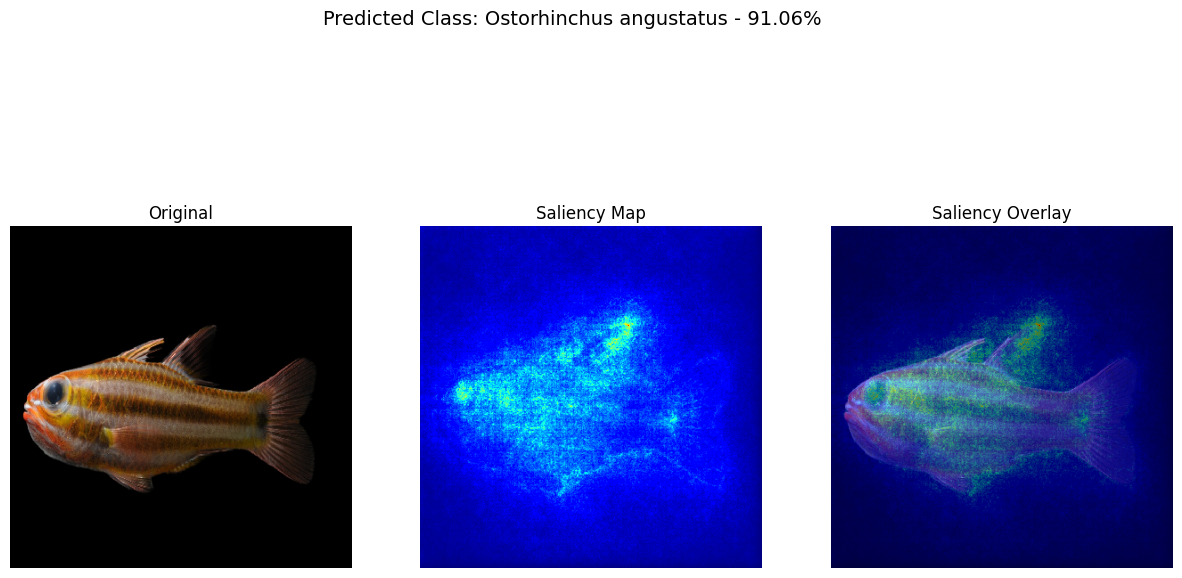

In [ ]:
idx = random.randint(0, len(test_df))



ai.saliency_map('species', test_df['image_path'][idx])
print(f"Correct Species: {test_df['species'][idx]} - Index: {idx}") 

# Index with Intersting Mistaskes
# 834 - 853 - 256 - 57 - 512

# Index with Intersting Corrects
# 1084 - 1103 - 176 - 861 - 262 - 67 - 1182 - 968 - 679 (Body Shape)
# 239 - 728 - 1188 - 1143 - 127 - 402 - 114 - 371 - 855 - 253 (expliced body features)
# 692(obj detected) - 916 - 1228 - 774 - 741 (Great) - 952 - 1221 (OBJ Detected) - 543

# He guess
# 904 - 1182 - 127

In [66]:
test_df[test_df['species'] == 'Acanthemblemaria aspera']

,image_path,folder_label,family,genus,species
26,/Users/leonardo/Documents/Projects/cryptovisio...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera
61,/Users/leonardo/Documents/Projects/cryptovisio...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera
257,/Users/leonardo/Documents/Projects/cryptovisio...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera
295,/Users/leonardo/Documents/Projects/cryptovisio...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera
333,/Users/leonardo/Documents/Projects/cryptovisio...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera
354,/Users/leonardo/Documents/Projects/cryptovisio...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera
545,/Users/leonardo/Documents/Projects/cryptovisio...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera
667,/Users/leonardo/Documents/Projects/cryptovisio...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera
843,/Users/leonardo/Documents/Projects/cryptovisio...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera
1085,/Users/leonardo/Documents/Projects/cryptovisio...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera


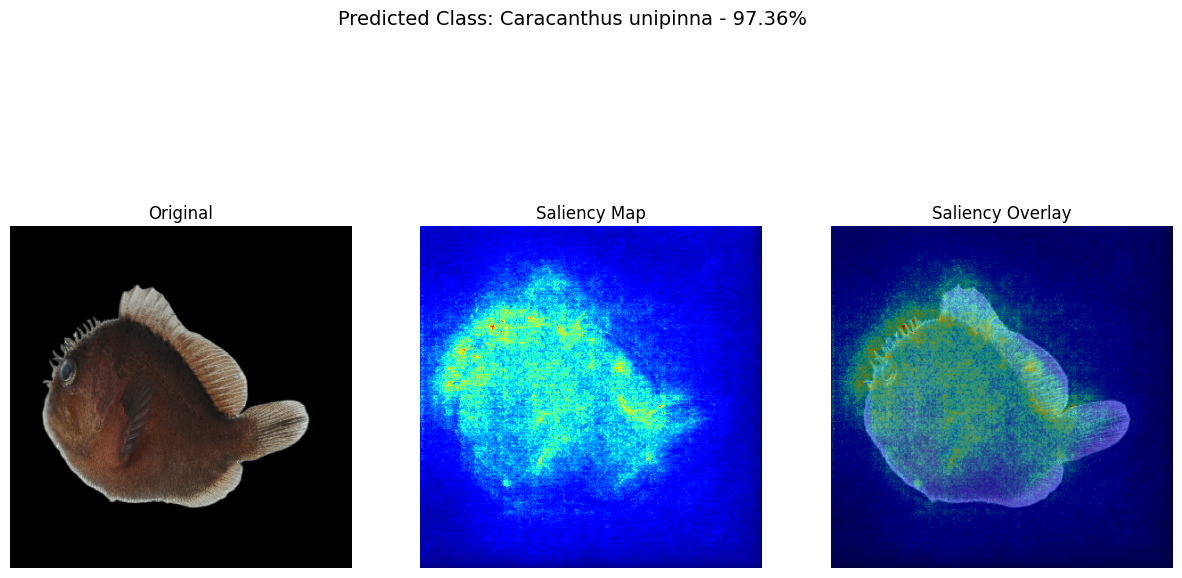

In [30]:
ai.saliency_map('species', test_df['image_path'].values[253]) # 257 - 333 - 1291 - 667 - 843

In [80]:
test_df[test_df['species'] == 'Eviota melasma']

,image_path,folder_label,family,genus,species
36,/Users/leonardo/Documents/Projects/cryptovisio...,Gobiidae_Eviota_melasma,Gobiidae,Eviota,Eviota melasma
319,/Users/leonardo/Documents/Projects/cryptovisio...,Gobiidae_Eviota_melasma,Gobiidae,Eviota,Eviota melasma
384,/Users/leonardo/Documents/Projects/cryptovisio...,Gobiidae_Eviota_melasma,Gobiidae,Eviota,Eviota melasma
565,/Users/leonardo/Documents/Projects/cryptovisio...,Gobiidae_Eviota_melasma,Gobiidae,Eviota,Eviota melasma
646,/Users/leonardo/Documents/Projects/cryptovisio...,Gobiidae_Eviota_melasma,Gobiidae,Eviota,Eviota melasma
688,/Users/leonardo/Documents/Projects/cryptovisio...,Gobiidae_Eviota_melasma,Gobiidae,Eviota,Eviota melasma
691,/Users/leonardo/Documents/Projects/cryptovisio...,Gobiidae_Eviota_melasma,Gobiidae,Eviota,Eviota melasma
733,/Users/leonardo/Documents/Projects/cryptovisio...,Gobiidae_Eviota_melasma,Gobiidae,Eviota,Eviota melasma
800,/Users/leonardo/Documents/Projects/cryptovisio...,Gobiidae_Eviota_melasma,Gobiidae,Eviota,Eviota melasma
926,/Users/leonardo/Documents/Projects/cryptovisio...,Gobiidae_Eviota_melasma,Gobiidae,Eviota,Eviota melasma


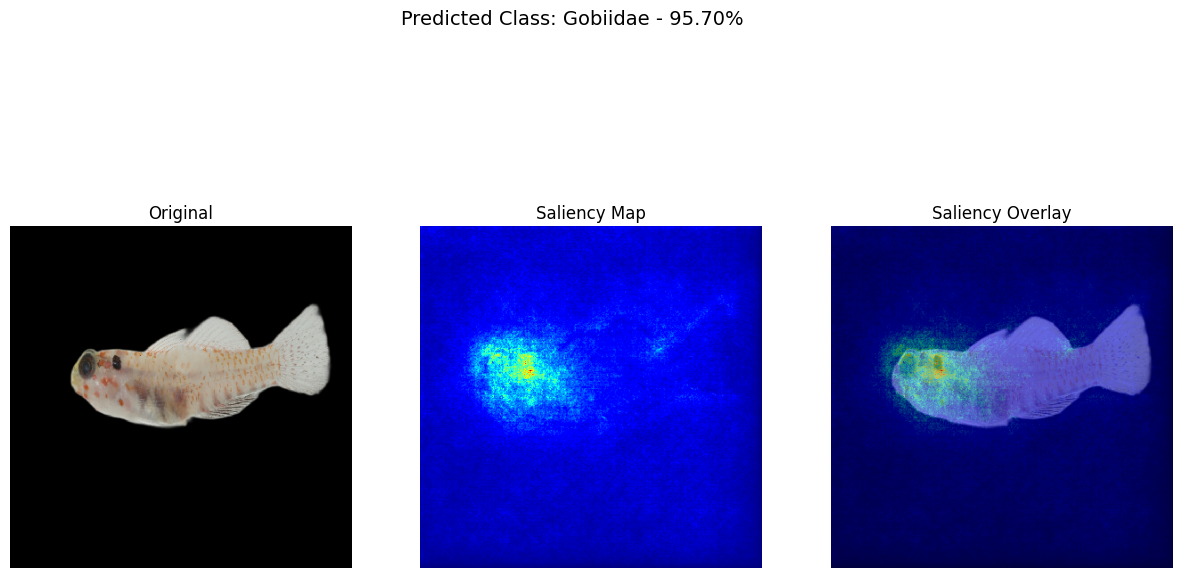

In [26]:
ai.saliency_map('family', test_df['image_path'].values[926])

# No detection 
# 800

# Body Feature
# 1259 - 1336 - 926

In [4]:
import numpy as np
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

class CryptoVisionAIWithLIME(CryptoVisionAI):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.lime_explainer = lime_image.LimeImageExplainer()
    
    def lime_predict(self, images):
        """
        Wrapper function for LIME to predict class probabilities.
        
        Parameters:
            images (np.array): Batch of images to predict.
            
        Returns:
            np.array: Predicted probabilities for each class.
        """
        preds = self.model.predict(images, verbose=0)
        # Assuming we're explaining the species level (preds[2])
        return preds[2]
    
    def explain_with_lime(self, image_path, top_labels=5, hide_color=None, num_samples=1000):
        """
        Generates LIME explanation for a single image.
        
        Parameters:
            image_path (str): Path to the image to explain.
            top_labels (int): Number of top labels to consider.
            hide_color (tuple or None): Color to hide superpixels.
            num_samples (int): Number of samples to generate for LIME.
        
        Returns:
            dict: Explanation containing the image and overlay.
        """
        self.image_path = image_path
        img = np.squeeze(self.image_array, axis=0)  # Remove batch dimension

        explanation = self.lime_explainer.explain_instance(
            img,  # Image to explain
            self.lime_predict,  # Function to predict probabilities
            top_labels=top_labels,
            hide_color=hide_color,
            num_samples=num_samples
        )

        return explanation
    
    def plot_lime_explanation(self, explanation, image_path, label, figure_size=(15, 8)):
        """
        Plots the LIME explanation for a single label.
        
        Parameters:
            explanation (Explanation): LIME explanation object.
            image_path (str): Path to the original image.
            label (int): Label to visualize the explanation for.
            figure_size (tuple): Size of the matplotlib figure.
        """
        self.image_path = image_path
        img = np.squeeze(self.image_array, axis=0)  # Remove batch dimension

        # Get LIME mask
        temp, mask = explanation.get_image_and_mask(
            label,
            positive_only=True,
            num_features=10,
            hide_rest=False
        )

        # Plot the results
        plt.figure(figsize=figure_size)
        
        # Original image
        plt.subplot(1, 3, 1)
        plt.title("Original Image")
        plt.imshow(img.astype('uint8'))
        plt.axis('off')

        # LIME explanation
        plt.subplot(1, 3, 2)
        plt.title("LIME Explanation")
        plt.imshow(mark_boundaries(temp, mask))
        plt.axis('off')
        
        # Original image with LIME explanation
        plt.subplot(1, 3, 3)
        plt.title("Original Image with LIME Explanation")
        plt.imshow(img.astype('uint8'))
        plt.imshow(mark_boundaries(temp, mask), cmap='jet', alpha=0.5)
        plt.axis('off')

        plt.tight_layout()
        plt.show()

In [5]:
# Import the extended class
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Instantiate the CryptoVisionAIWithLIME class
ai_with_lime = CryptoVisionAIWithLIME(
    model_path=TRAINED_MODEL_PATH,
    family_names=family_labels,
    genus_names=genus_labels,
    species_names=species_labels
)


/Users/leonardo/miniconda3/envs/cvenv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 98 variables whereas the saved optimizer has 102 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [37]:
image_path = test_df.iloc[741]['image_path']  # Path to an image
explanation = ai_with_lime.explain_with_lime(image_path, top_labels=3, num_samples=1000)


  0%|          | 0/1000 [00:00<?, ?it/s]

In [38]:
# Check top labels in the explanation
print("Top labels (indices):", explanation.top_labels)

# Map indices to class names
for label_idx in explanation.top_labels:
    print(f"Class Index: {label_idx}, Class Name: {species_labels[label_idx]}")

Top labels (indices): [37, 13, 46]
Class Index: 37, Class Name: Nemateleotris magnifica
Class Index: 13, Class Name: Cypho purpurascens
Class Index: 46, Class Name: Pomacentrus amboinensis


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


{'family': {'name': 'Gobiidae', 'label': 6, 'prob': 0.9863}, 'genus': {'name': 'Nemateleotris', 'label': 28, 'prob': 0.999}, 'species': {'name': 'Nemateleotris magnifica', 'label': 37, 'prob': 0.9976}}


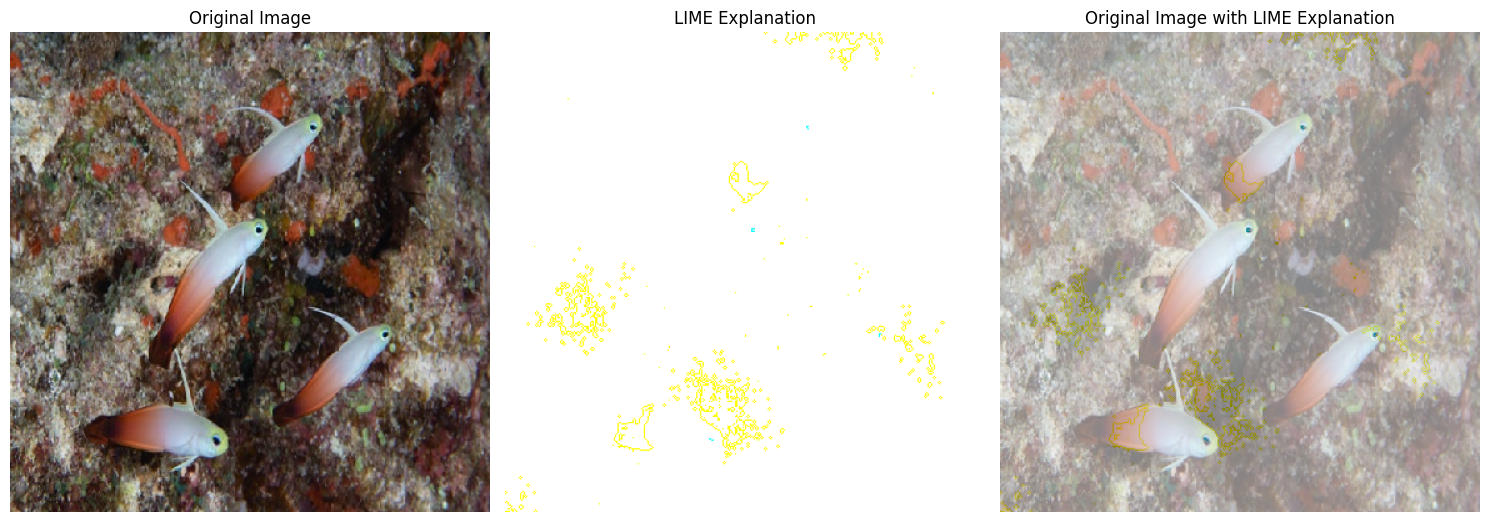

In [39]:
# Visualize the explanation for a specific label (e.g., species class 0)
print(ai.predict_from_path(image_path, 'complete'))
ai_with_lime.plot_lime_explanation(explanation, image_path, label=explanation.top_labels[0])

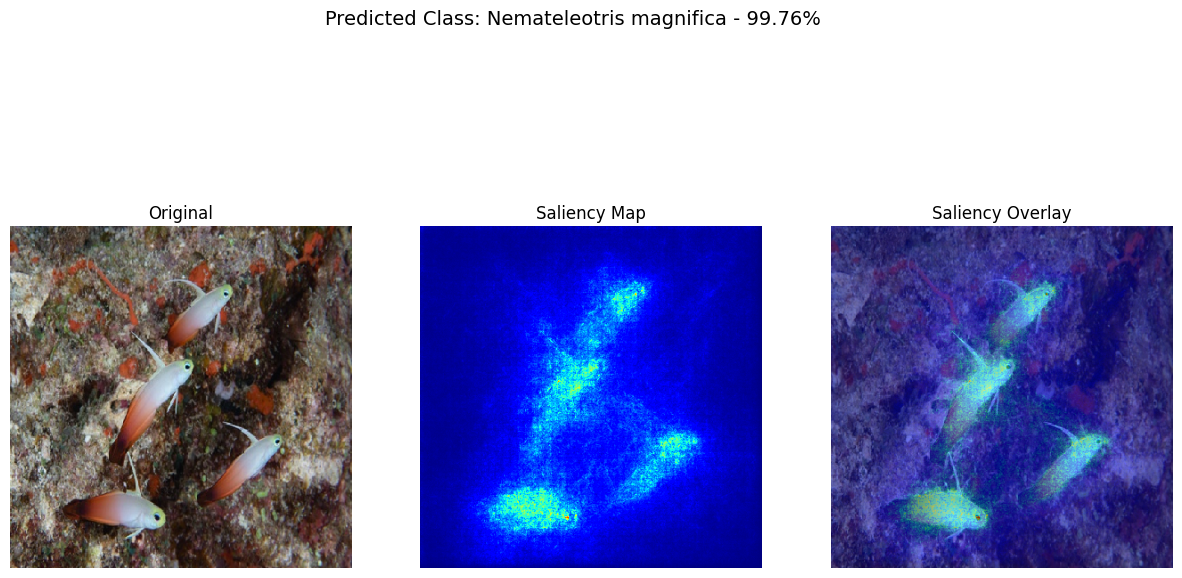

In [40]:
ai.saliency_map('species', image_path)